In [41]:
import pandas as pd

df = pd.read_csv('La_societat_catalana_davant_del_Covid-19._Percepcions__estats_d__nim_i_preocupacions..csv')

pd.set_option('display.max_columns', None)

df

,id_onada,onada,vpdef,dia_Enquesta,mes_enquesta,provincia,p46,zones específiques,sexe,edat_m,edat_rec,fills,sit_lab,dies_sortida,dies_sortida_m,p25_1Treballar,p25_2comprar,p25_3gos,p25_4tabac,p25_5premsa,p25_6cura_persones,p25_7metge,p25_8compra_familiar,p25_9alimentar,p25_11passejarfills,p25_97altres,p25_99nc,p23_1_nerviós,p23_2_irritat,p23_3_alegre,p23_4_melancolic,p23_5_tens,p23_6_optimista,p23_7_desanimat,p23_8_enutjat,p23_9_ansios,p23_10_apagat,p23_11_molest,p23_12_animat,p23_13_intranquil,p23_14_enfadat,p23_15_content,p23_16_trist,E1,E2,E3,E4,p31_1,p31_2,p31_3,p31_4,p32_1,p32_2,p32_3,p32_4,dies_m,dies_rec
0,10654,1,1.202538,23,3,Barcelona,Municipi d’entre 1.000 i 5.000 habitants,Resta,Dona,42.0,31-45 anys,No,Treballador/a amb contracte temporal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,2.0,0.0,0.00,2.25,0.00,3.50,Bastant,Bastant,Bastant,Molt,Poc,Poc,Poc,Poc,2.0,Fins 30 dies
1,10358,1,1.202538,20,3,Barcelona,Municipi d’entre 5.001 i 10.000 habitants,Resta,Dona,49.0,46-65 anys,Sí,Autònom/a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0,NaN,10.0,0.0,10.0,10.0,10.0,10.0,10.0,0.0,10.0,10.0,0.0,10.0,10.00,10.00,10.00,0.00,Molt,Molt,Molt,Molt,Molt,Molt,Molt,Molt,60.0,46-60 dies
2,10043,1,0.226709,20,3,Tarragona,Municipi de més de 100.000 habitants,Resta,Home,51.0,46-65 anys,Sí,Treballador/a amb contracte fixe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,0.00,0.00,NaN,Gens,Poc,Poc,Poc,Poc,Poc,Gens,Gens,42.0,31-45 dies
3,10030,1,1.202538,20,3,Barcelona,Municipi d’entre 10.001 i 100.000 habitants,Resta,Dona,45.0,31-45 anys,Sí,Treballador/a amb contracte fixe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,5.0,1.0,1.0,3.0,2.0,10.0,5.0,2.0,8.0,5.0,3.0,10.0,5.0,2.0,1.75,3.00,7.50,4.50,Poc,Bastant,Poc,Molt,Poc,Poc,Poc,Molt,30.0,Fins 30 dies
4,10333,1,3.719964,20,3,Barcelona,Municipi d’entre 10.001 i 100.000 habitants,Resta,Dona,58.0,46-65 anys,Sí,Funcionari/ària,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,4.0,4.0,4.0,4.0,7.0,7.0,5.0,6.0,6.0,3.0,8.0,8.0,4.0,8.0,6.25,6.25,7.25,3.75,Bastant,Bastant,Bastant,Bastant,Bastant,Bastant,Bastant,Molt,60.0,46-60 dies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,50264,5,4.000000,27,4,Barcelona,Municipi d’entre 10.001 i 100.000 habitants,Resta,Dona,62.0,46-65 anys,Sí,Jubilat/da o pensionista,Cada dia (els 7 dies),7.0,No,Surt de casa Per anar a comprar coses bàsiques,Surt de casa Per anar a passejar al gos,No,No,No,Surt de casa Per una visita o tractament mèdic,No,No,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poc,Poc,Poc,Poc,Poc,Bastant,Poc,Bastant,20.0,Fins 30 dies
4570,50887,5,1.356052,29,4,Lleida,Municipi de més de 100.000 habitants,Resta,Dona,66.0,+65 anys,Sí,Jubilat/da o pensionista,2 dies,2.0,No,Surt de casa Per anar a comprar coses bàsiques,No,No,No,No,No,No,No,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gens,Poc,Gens,Gens,Gens,Molt,Gens,Bastant,242.0,Més de 60 dies
4571,50372,5,0.318641,27,4,Tarragona,Municipi d’entre 1.000 i 5.000 habitants,Resta,Dona,54.0,46-65 anys,Sí,Aturat/da,2 dies,2.0,No,Surt de casa Per anar a comprar coses bàsiques,Surt de casa Per anar a passejar al gos,No,No,No,Surt de casa Per una visita o tractament mèdic,No,No,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poc,Bastant,Bastant,Bastant,Bastant,Bastant,Bastant,Bastant,15.0,Fins 30 dies
4572,51130,5,1.546631,2,5,Lleida,Municipi de més de 100.000 habitants,Resta,Dona,29.0,16-30 anys,Sí,Treballador/a amb contracte fixe,1 dia,1.0,No,Surt de casa Per anar a comprar coses bàsiques,No,No,No,No,No,No,No,0,0

In [42]:
df.shape

(4574, 57)

# Comprobar nulos

In [43]:
# Creo un dataframe donde tengo las variables y el número de nulos de cada variable y los ordeno.
Nulos=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Nulos'}).sort_values(by='Nulos',ascending=False)
# Calculo el porcentaje de nulos
Nulos['PorcentajeNulos'] = Nulos['Nulos']/len(df)
# Muestro los nulos que teníamos hasta ahora
print(Nulos)

                      Nulos  PorcentajeNulos
p23_8_enutjat          1966         0.429821
p23_14_enfadat         1942         0.424574
p23_15_content         1941         0.424355
p23_11_molest          1940         0.424136
p23_13_intranquil      1938         0.423699
p23_12_animat          1938         0.423699
p23_4_melancolic       1938         0.423699
p23_10_apagat          1937         0.423481
p23_7_desanimat        1937         0.423481
p23_16_trist           1936         0.423262
p23_9_ansios           1934         0.422825
p23_6_optimista        1934         0.422825
p23_3_alegre           1930         0.421950
p23_5_tens             1926         0.421076
p23_2_irritat          1922         0.420201
p23_1_nerviós          1919         0.419545
E1                     1919         0.419545
E4                     1918         0.419327
E3                     1918         0.419327
E2                     1917         0.419108
dies_sortida_m          713         0.155881
p25_99nc  

Muchas variables tienen diferentes porcentajes de nulos, vemos que sobretodo hay como 2 escalones de cantidad de nulos, de manera que hay preguntas que tienen una cantidad de nulos muy parecidas. 

Vemos que por una parte las variables de identificación no tienen nulos, y las variables de días que va a durar la pandemia, y las preguntas de preocupación por salud y economía tienen muy pocos nulos y no supone ningún problema. 

También se ve que las variables de cuantos días has salido y para que has salido tienen un 15% de nulos de manera general, habrá que estudiar por qué. Igualmente, las variables de sentimientos de las personas, se encuentran con un porcentaje de nulos de un 42%. Estos nulos tan iguales en estas preguntas puede ser porque las preguntas dejaran de realizarse durante algunas semanas. 

In [44]:
df.onada.value_counts()

5    1110
4    1057
2     904
3     801
1     702
Name: onada, dtype: int64

In [45]:
reduc = df[['onada','dies_sortida']]
reduc[reduc['dies_sortida'].isnull()].value_counts("onada")

onada
1    702
dtype: int64

Vemos que los nulos de las preguntas de dias de salida, y como es lógico también de las preguntas de porqué has salido, son todos durante la primera onada, lo que indica que no se hacia esta pregunta en ese tiempo.

In [46]:
reduc = df[['onada','p23_3_alegre']]
reduc[reduc['p23_3_alegre'].isnull()].value_counts("onada")

onada
5    1110
3     801
4       8
2       6
1       5
dtype: int64

Vemos que la gran mayoría de nulos de las preguntas de sentimientos son en la 5a onada y 3a onada que dejarían de hacerse estas preguntas. 

# Tipos de variables

In [47]:
df.dtypes.value_counts()

object     29
float64    24
int64       4
dtype: int64

## Variables categóricas

In [48]:
categoricas = df.select_dtypes(include='object').columns.to_list()
categoricas

['provincia',
 'p46',
 'zones específiques',
 'sexe',
 'edat_rec',
 'fills',
 'sit_lab',
 'dies_sortida',
 'p25_1Treballar',
 'p25_2comprar',
 'p25_3gos',
 'p25_4tabac',
 'p25_5premsa',
 'p25_6cura_persones',
 'p25_7metge',
 'p25_8compra_familiar',
 'p25_9alimentar',
 'p25_11passejarfills',
 'p25_97altres',
 'p25_99nc',
 'p31_1',
 'p31_2',
 'p31_3',
 'p31_4',
 'p32_1',
 'p32_2',
 'p32_3',
 'p32_4',
 'dies_rec']

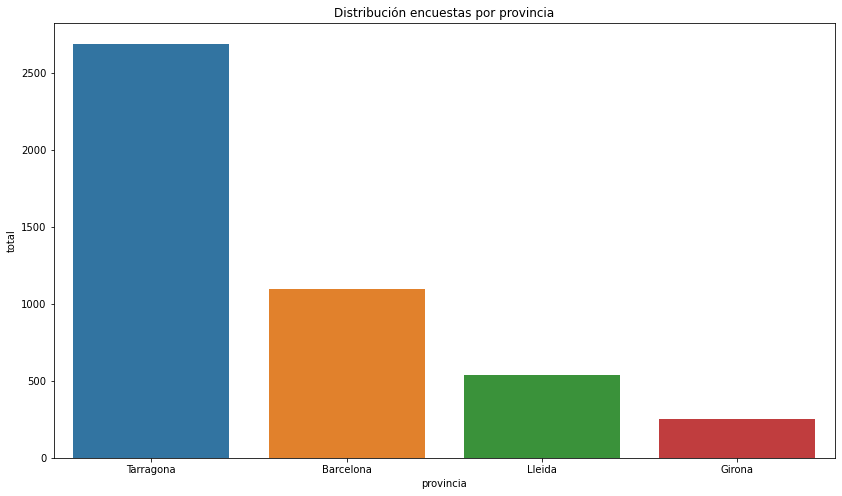

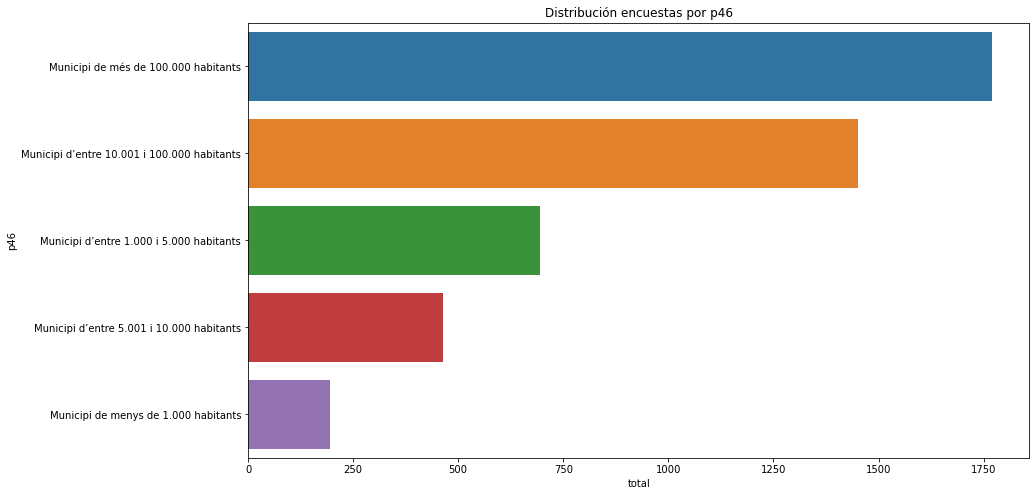

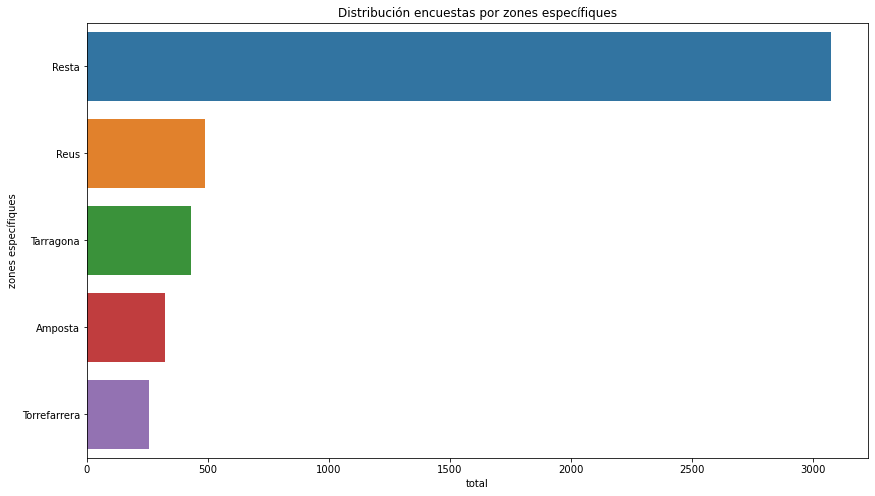

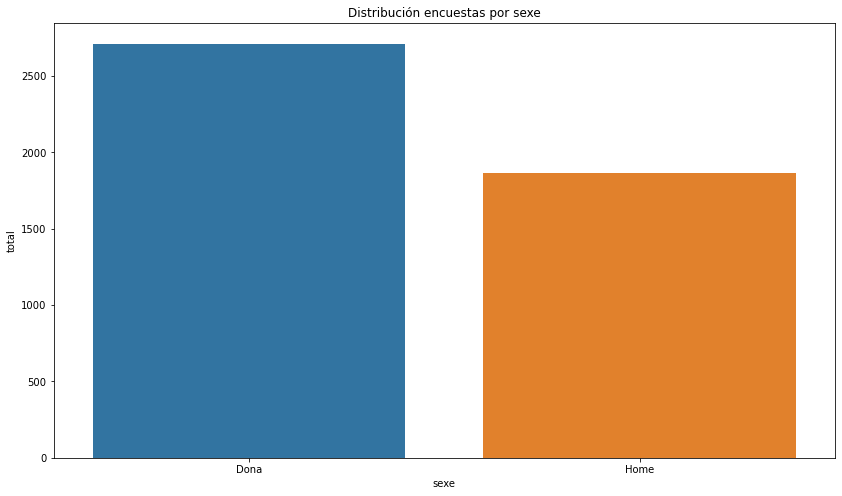

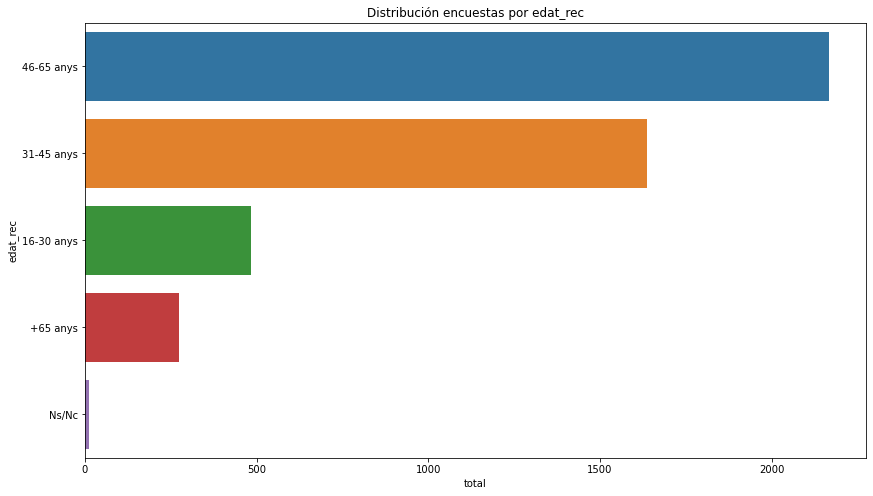

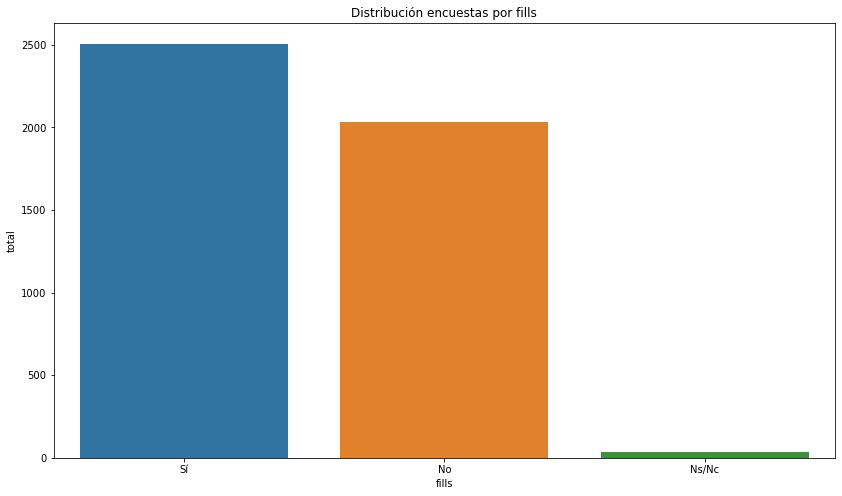

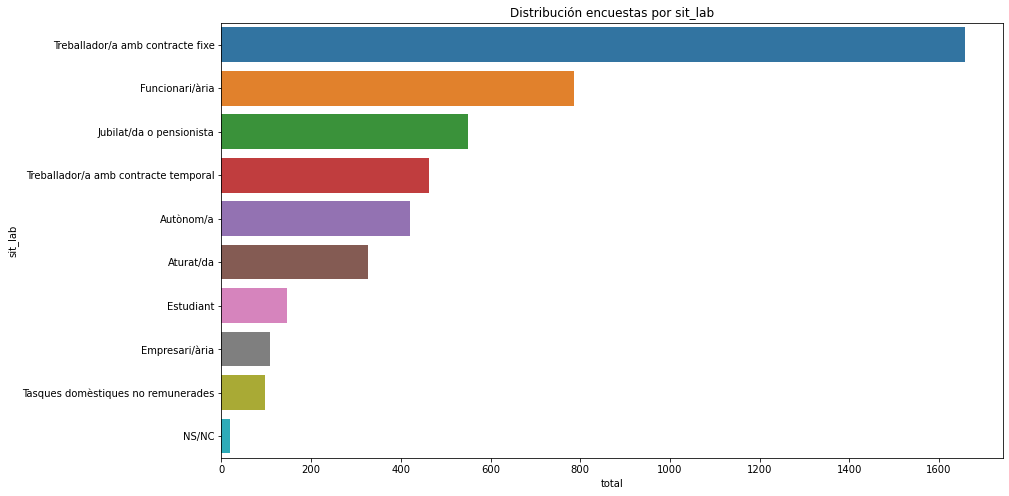

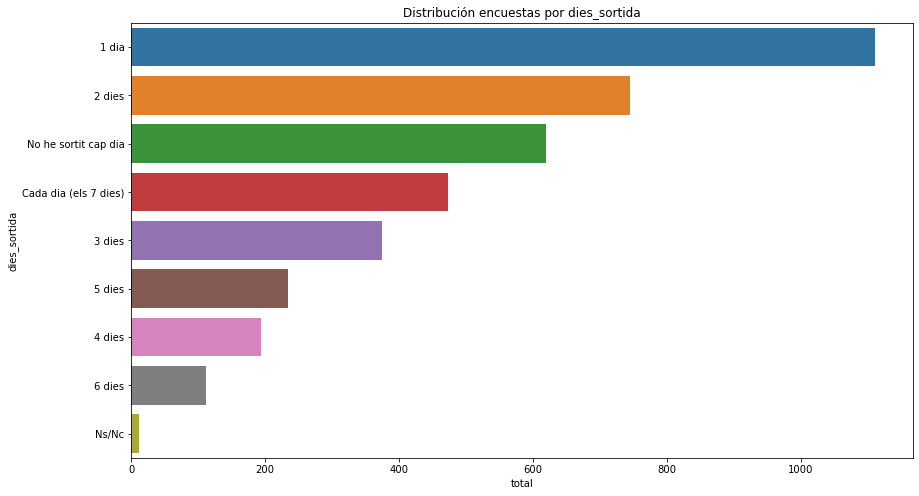

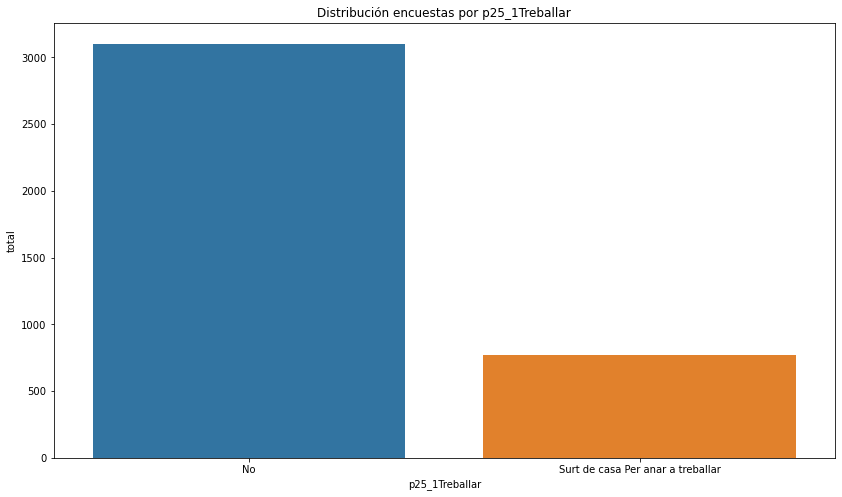

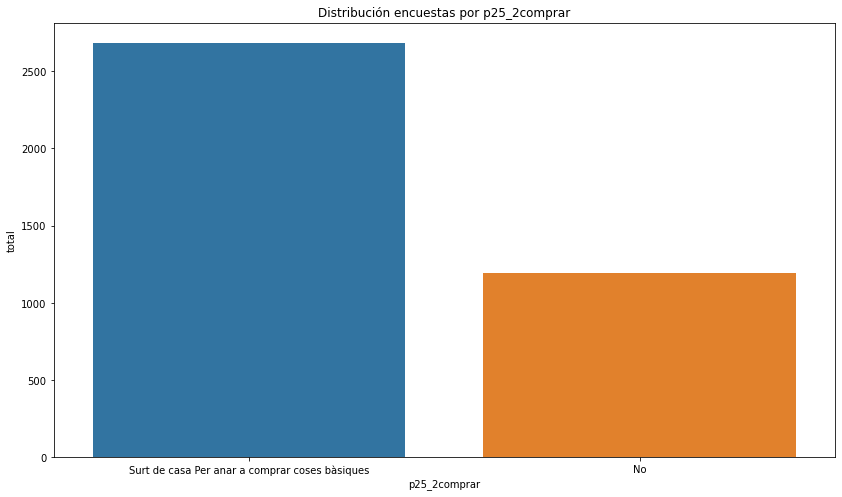

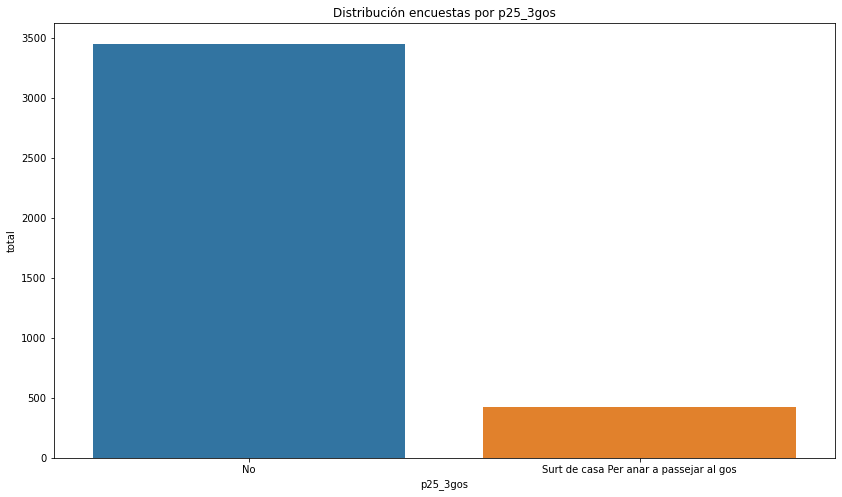

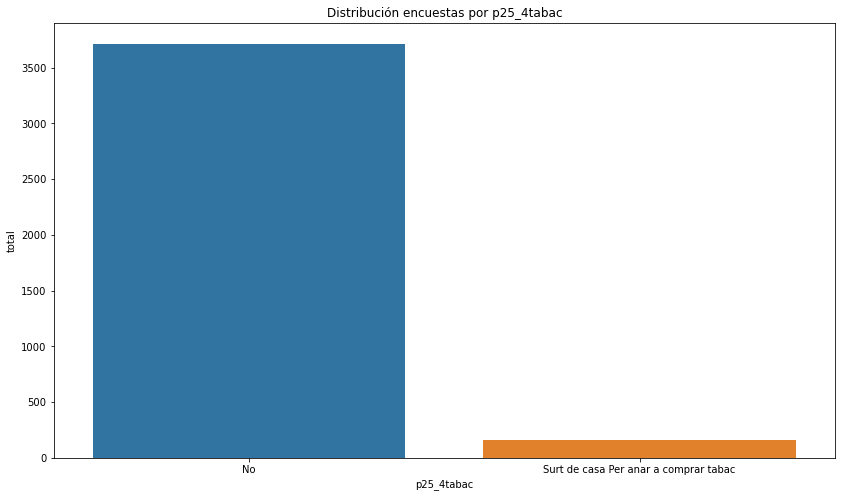

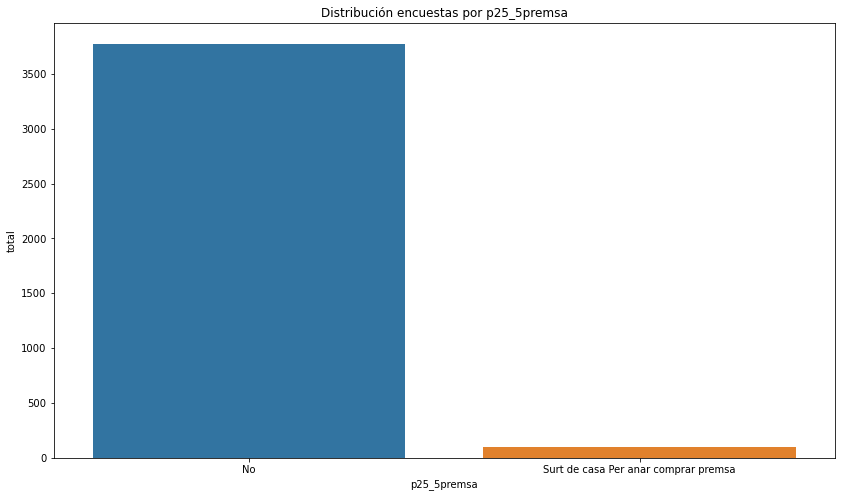

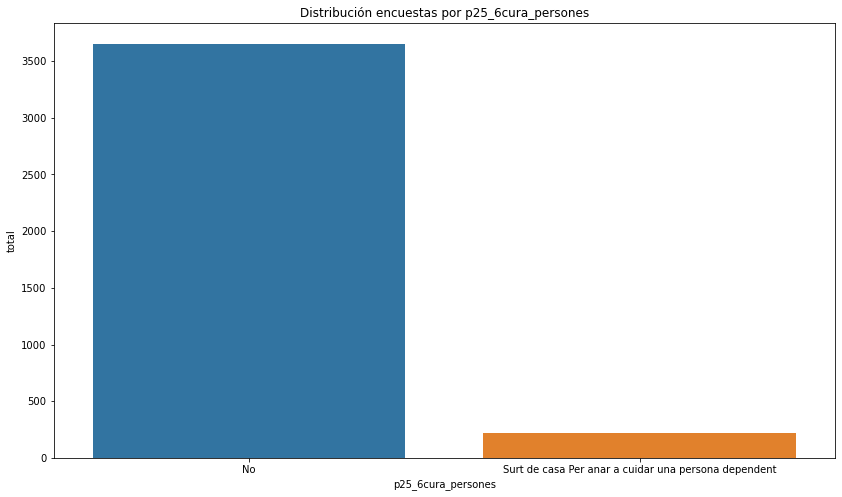

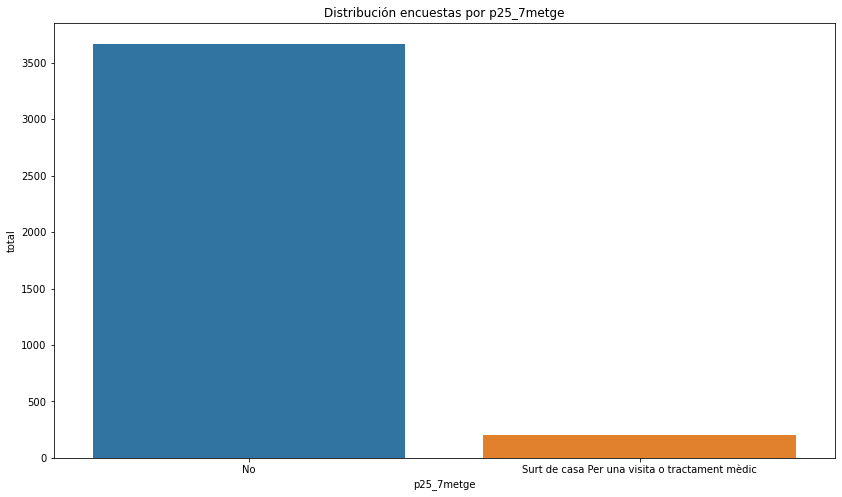

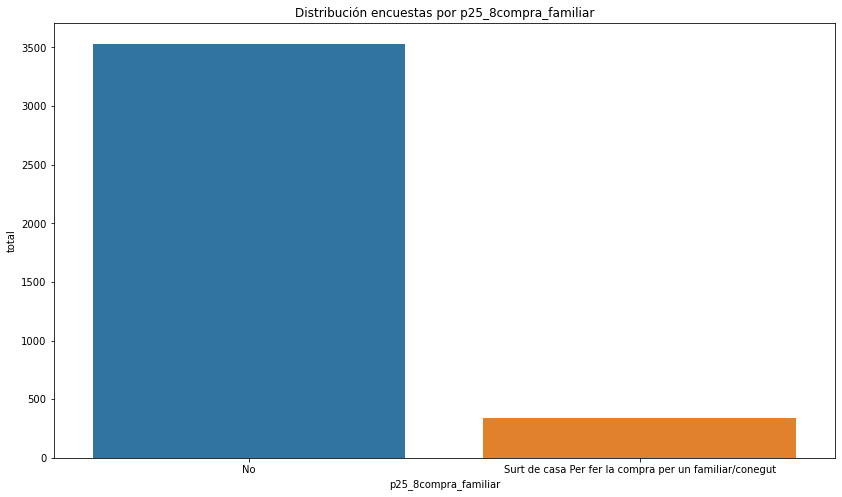

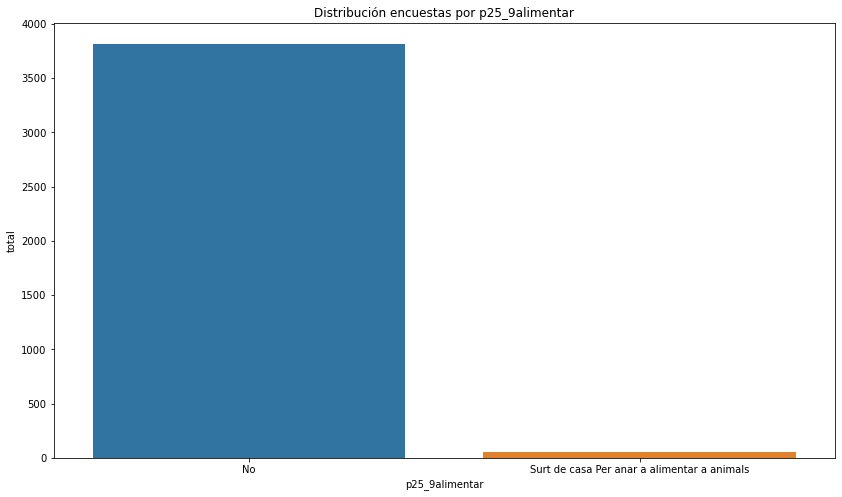

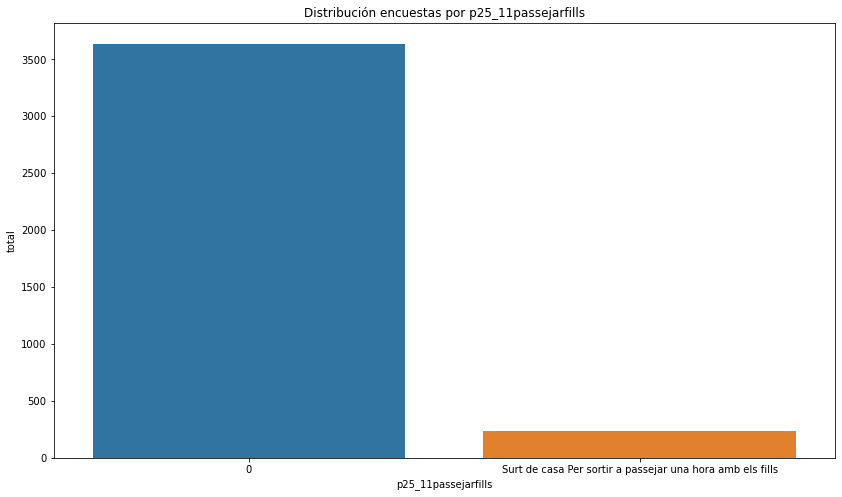

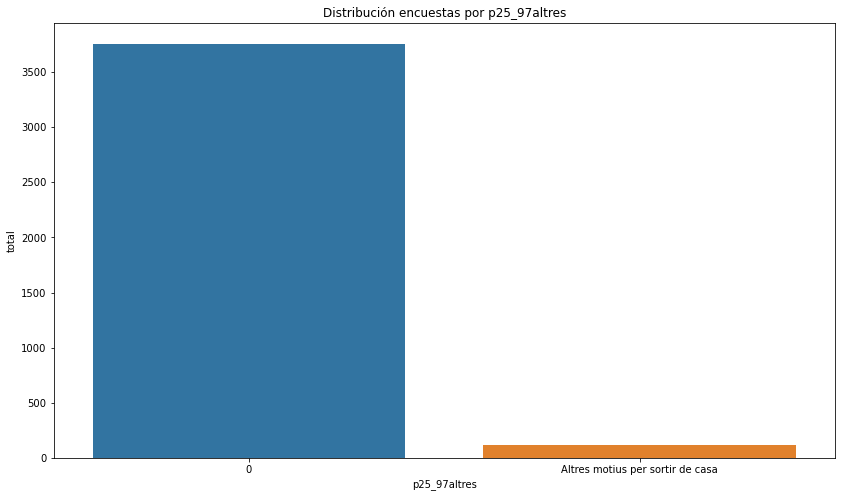

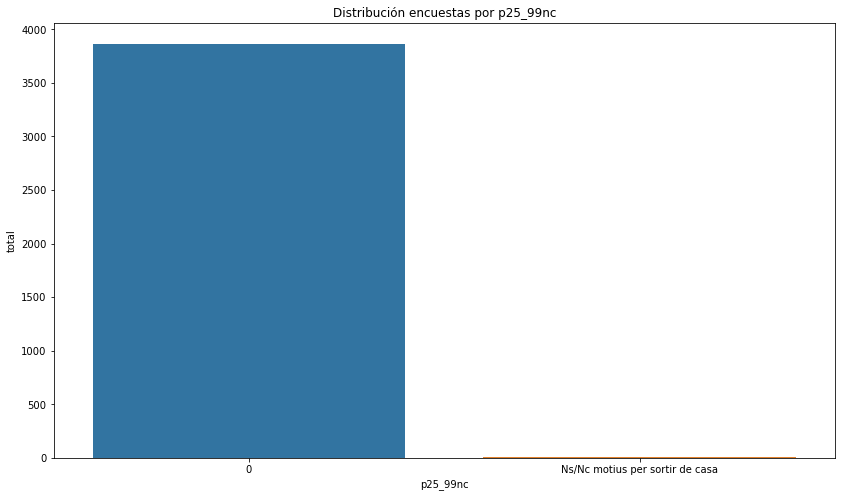

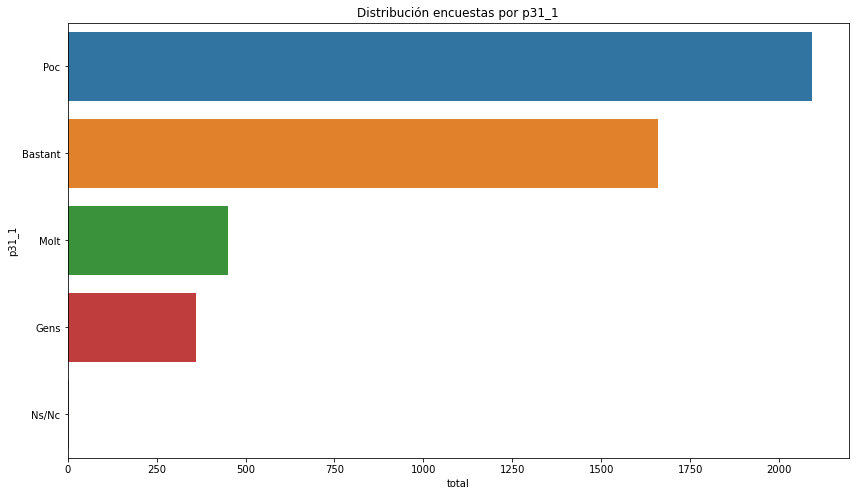

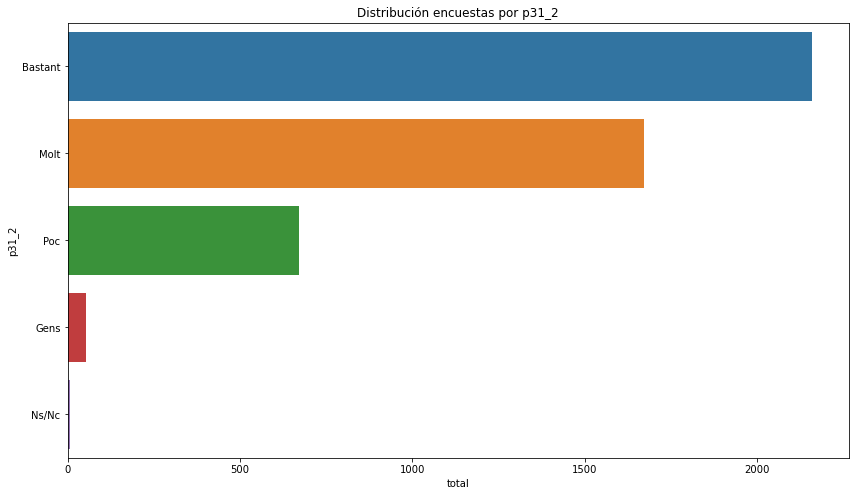

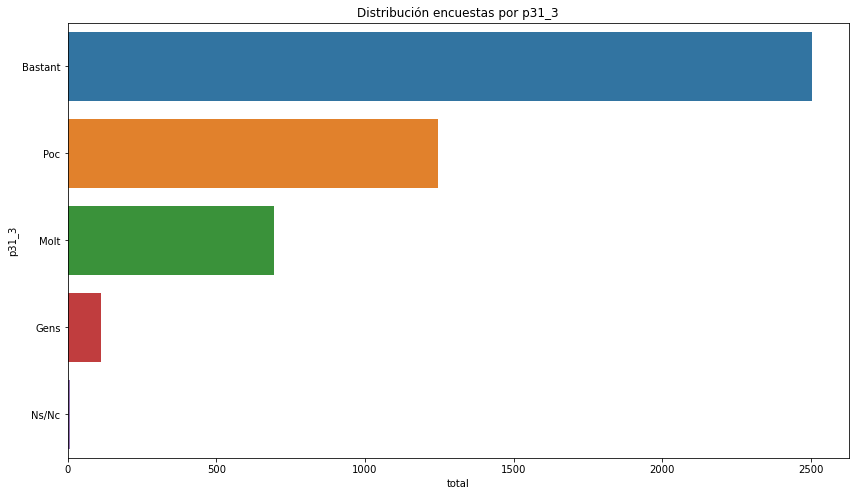

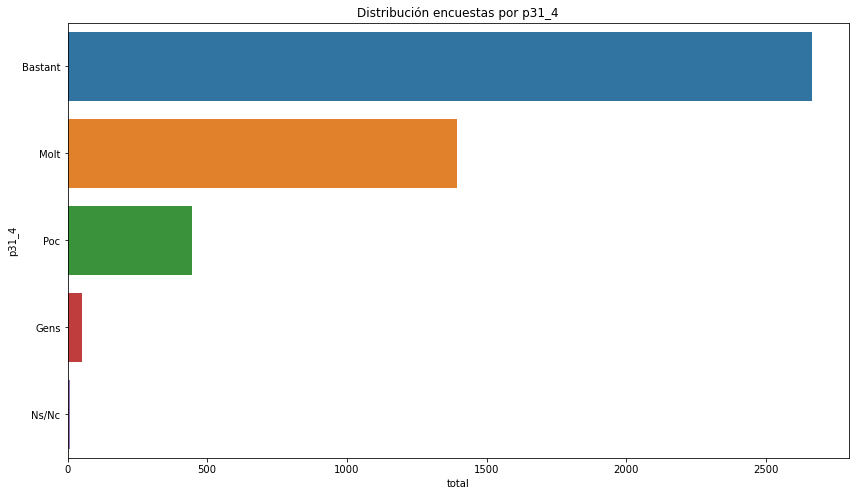

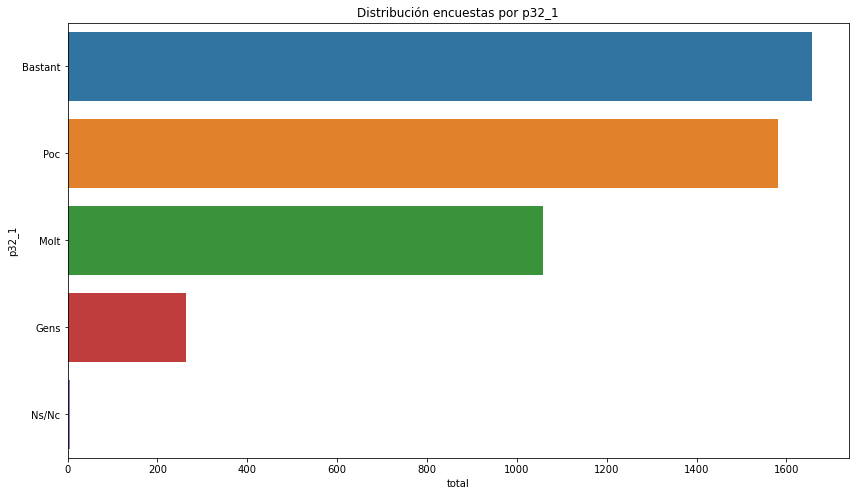

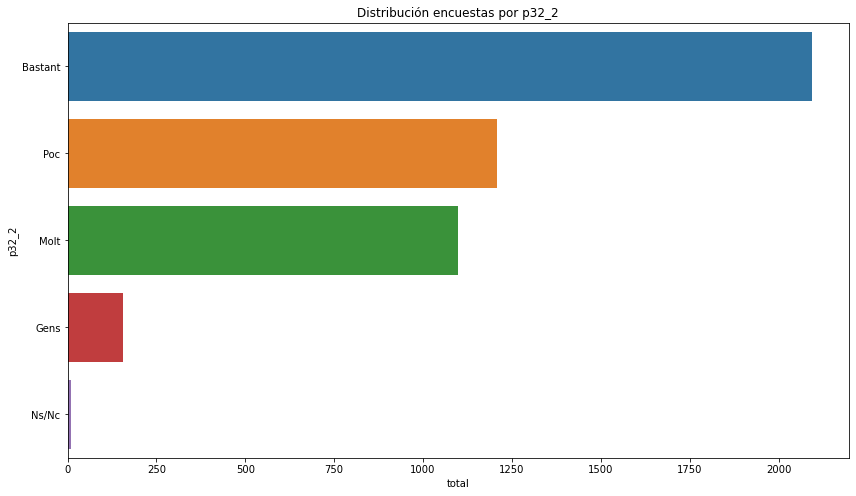

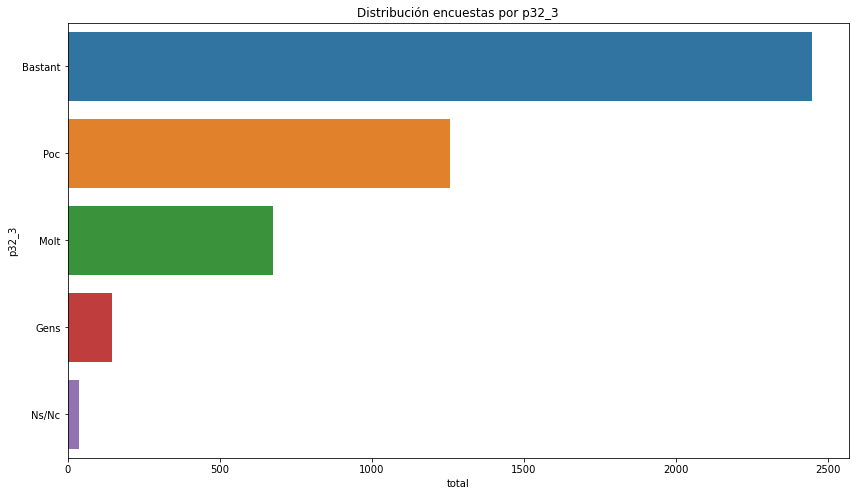

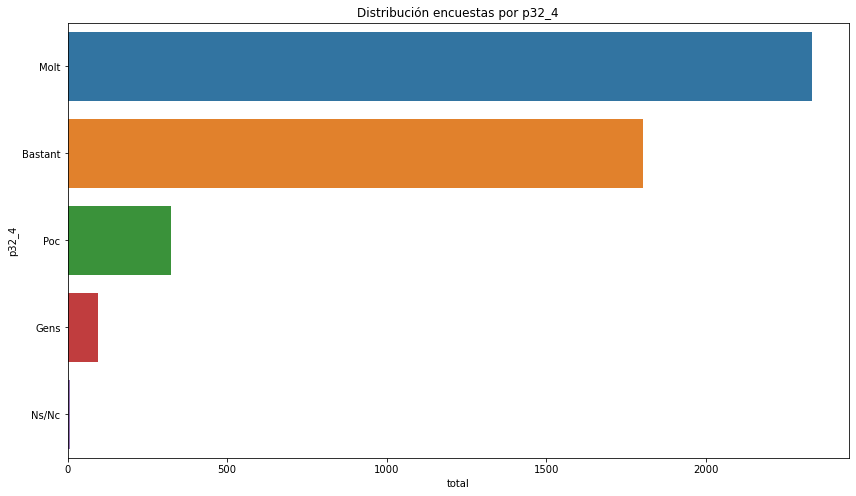

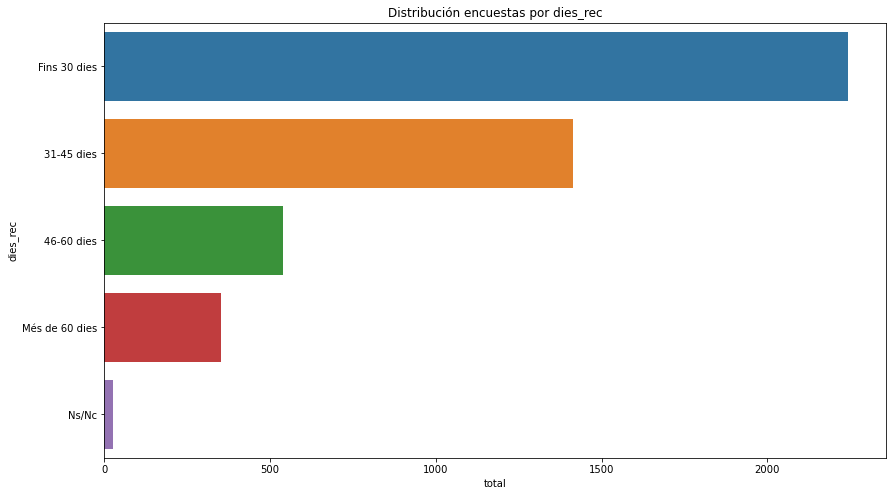

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn

for var in categoricas: 
    plt.figure(figsize=(14,8))
    num_encuestas_por_var = pd.DataFrame(df[var].value_counts())
    num_encuestas_por_var['total'] = num_encuestas_por_var[var]
    num_encuestas_por_var[var] = num_encuestas_por_var.index
    if num_encuestas_por_var.shape[0] < 5:
        je = sn.barplot(y = 'total', x = var,data=num_encuestas_por_var)
    else:
        je = sn.barplot(y =var, x =  'total',data=num_encuestas_por_var)
    je.set(title='Distribución encuestas por '+var)
    plt.show()

Vemos como cada variable tiene su propia cantidad de categorias, y las preguntas que tratan un mismo tema tienen los mismos tipos y números de categorias. 

# Variables numéricas

In [50]:
floats = df.select_dtypes(include='float64').columns.to_list()
floats

['vpdef',
 'edat_m',
 'dies_sortida_m',
 'p23_1_nerviós',
 'p23_2_irritat',
 'p23_3_alegre',
 'p23_4_melancolic',
 'p23_5_tens',
 'p23_6_optimista',
 'p23_7_desanimat',
 'p23_8_enutjat',
 'p23_9_ansios',
 'p23_10_apagat',
 'p23_11_molest',
 'p23_12_animat',
 'p23_13_intranquil',
 'p23_14_enfadat',
 'p23_15_content',
 'p23_16_trist',
 'E1',
 'E2',
 'E3',
 'E4',
 'dies_m']

Las variables numéricas son una ponderación estadística, la edad de la persona, los días que ha salido, los días que estima que durará la pandemia y las preguntas de como se siente una persona y el resumen de temas de sentimientos, que tienen valores del 0 al 10. 

In [51]:
ints = df.select_dtypes(include='int64').columns.to_list()
ints

['id_onada', 'onada', 'dia_Enquesta', 'mes_enquesta']

Por último, hay variables enteras, que son numéricas pero realmente representan una categoría como son el identificador de la persona o el de la onada, o el día de la encuesta y el mes. 

# Generación de datasets para visualizaciones

## Sunburst

In [52]:
def nivel_3(variables):
    sunburst = df.value_counts(variables).reset_index()
    diccionario = {}
    diccionario["name"] =variables[0]
    array_dics = []
    for ind in sunburst[variables[0]].unique():
        diccionario_nivel2 = {}
        diccionario_nivel2["name"] = ind
        array_dics_2 = []
        for ind_2 in sunburst.loc[sunburst[variables[0]] == ind][variables[1]].unique():
            diccionario_nivel3 = {}
            diccionario_nivel3["name"] = ind_2
            array_dics_3 = []
            for col in sunburst.loc[(sunburst[variables[0]] == ind) & (sunburst[variables[1]] == ind_2)][variables[2]].unique():
                array_dics_3.append({"name":col, "value": sunburst.loc[(sunburst[variables[0]] == ind )& (sunburst[variables[1]] == ind_2 )& (sunburst[variables[2]] == col )][0].to_list()[0]})
            diccionario_nivel3["children"] = array_dics_3
            array_dics_2.append(diccionario_nivel3)
        diccionario_nivel2["children"] = array_dics_2
        array_dics.append(diccionario_nivel2)
    diccionario["children"] = array_dics
    return(diccionario)

def nivel_2(variables):
    sunburst = df.value_counts(variables).reset_index()
    diccionario = {}
    diccionario["name"] =variables[0]
    array_dics = []
    for ind in sunburst[variables[0]].unique():
        diccionario_nivel2 = {}
        diccionario_nivel2["name"] = ind
        array_dics_2 = []
        for col in sunburst.loc[sunburst[variables[0]] == ind][variables[1]].unique():
            array_dics_2.append({"name":col, "value": sunburst.loc[(sunburst[variables[0]] == ind )& (sunburst[variables[1]] == col )][0].to_list()[0]})
        diccionario_nivel2["children"] = array_dics_2
        array_dics.append(diccionario_nivel2)
    diccionario["children"] = array_dics
    return(diccionario)


In [53]:
import json
df["Max_sentimiento"] = df[['p23_1_nerviós',
 'p23_2_irritat',
 'p23_3_alegre',
 'p23_4_melancolic',
 'p23_5_tens',
 'p23_6_optimista',
 'p23_7_desanimat',
 'p23_8_enutjat',
 'p23_9_ansios',
 'p23_10_apagat',
 'p23_11_molest',
 'p23_12_animat',
 'p23_13_intranquil',
 'p23_14_enfadat',
 'p23_15_content',
 'p23_16_trist',]].idxmax(axis=1)

df.Max_sentimiento=df.Max_sentimiento.str.split("_", expand=True)[2]



In [54]:
variables = ["sexe", "edat_rec", "provincia"]
import itertools
permutations = list(itertools.permutations(variables, r=2))
permutations.append(['sexe'])
permutations.append(["edat_rec"])
permutations.append(["provincia"])
final = list()
for permutation in permutations:
    if len(permutation) != 1:
        lista =list(permutation)
        lista.append("Max_sentimiento")
        final.append({"name": lista[0]+"-"+lista[1]+"-"+lista[2],"children": nivel_3(lista)})
    else: 
        permutation.append("Max_sentimiento")
        final.append({"name": permutation[0]+"-"+permutation[1],"children": nivel_2(permutation)})

In [55]:
with open('final.json', 'w', encoding='utf8') as json_file:
    json.dump(final, json_file, ensure_ascii=False)

In [56]:
f = open('final.json',)
print(json.load(f))
f.close() 


[{'name': 'sexe-edat_rec-Max_sentimiento', 'children': {'name': 'sexe', 'children': [{'name': 'Dona', 'children': [{'name': '31-45 anys', 'children': [{'name': 'nerviÃ³s', 'value': 126}, {'name': 'melancolic', 'value': 118}, {'name': 'alegre', 'value': 77}, {'name': 'optimista', 'value': 52}, {'name': 'intranquil', 'value': 40}, {'name': 'ansios', 'value': 33}, {'name': 'tens', 'value': 30}, {'name': 'irritat', 'value': 28}, {'name': 'desanimat', 'value': 27}, {'name': 'animat', 'value': 20}, {'name': 'enutjat', 'value': 16}, {'name': 'apagat', 'value': 16}, {'name': 'molest', 'value': 14}, {'name': 'content', 'value': 10}, {'name': 'trist', 'value': 8}, {'name': 'enfadat', 'value': 5}]}, {'name': '46-65 anys', 'children': [{'name': 'nerviÃ³s', 'value': 113}, {'name': 'optimista', 'value': 104}, {'name': 'alegre', 'value': 96}, {'name': 'melancolic', 'value': 84}, {'name': 'intranquil', 'value': 55}, {'name': 'irritat', 'value': 29}, {'name': 'desanimat', 'value': 29}, {'name': 'animat

## Chord Diagram

In [57]:
cuerdas = df[['p25_1Treballar',
 'p25_2comprar',
 'p25_3gos',
 'p25_4tabac',
 'p25_5premsa',
 'p25_6cura_persones',
 'p25_7metge',
 'p25_8compra_familiar',
 'p25_9alimentar',
 'p25_11passejarfills']]

cuerdas

,p25_1Treballar,p25_2comprar,p25_3gos,p25_4tabac,p25_5premsa,p25_6cura_persones,p25_7metge,p25_8compra_familiar,p25_9alimentar,p25_11passejarfills
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4569,No,Surt de casa Per anar a comprar coses bàsiques,Surt de casa Per anar a passejar al gos,No,No,No,Surt de casa Per una visita o tractament mèdic,No,No,0
4570,No,Surt de casa Per anar a comprar coses bàsiques,No,No,No,No,No,No,No,0
4571,No,Surt de casa Per anar a comprar coses bàsiques,Surt de casa Per anar a passejar al gos,No,No,No,Surt de casa Per una visita o tractament mèdic,No,No,0
4572,No,Surt de casa Per anar a comprar coses bàsiques,No,No,No,No,No,No,No,0


In [58]:
import numpy as np

for col in cuerdas.columns:
    cuerdas[col] = np.where((cuerdas[col]=='No') | (cuerdas[col].isnull()), 0,1)

cuerdas

C:\Users\48784566-W\AppData\Local\Continuum\anaconda3\envs\Master\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,p25_1Treballar,p25_2comprar,p25_3gos,p25_4tabac,p25_5premsa,p25_6cura_persones,p25_7metge,p25_8compra_familiar,p25_9alimentar,p25_11passejarfills
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4569,0,1,1,0,0,0,1,0,0,1
4570,0,1,0,0,0,0,0,0,0,1
4571,0,1,1,0,0,0,1,0,0,1
4572,0,1,0,0,0,0,0,0,0,1


In [59]:
array_de_arrays = list()
for col in cuerdas.columns: 
    array = list()
    for col_2 in cuerdas.columns: 
        if col_2 == col:
            array.append(0)
        else: 
            array.append(cuerdas.loc[(cuerdas[col]==1) & (cuerdas[col_2] == 1)].shape[0])
    array_de_arrays.append(array)

In [60]:
array_de_arrays

[[0, 522, 85, 14, 13, 45, 20, 63, 15, 770],
 [522, 0, 318, 149, 97, 174, 136, 297, 41, 2680],
 [85, 318, 0, 25, 11, 23, 13, 32, 11, 421],
 [14, 149, 25, 0, 8, 12, 13, 24, 5, 157],
 [13, 97, 11, 8, 0, 13, 4, 19, 1, 98],
 [45, 174, 23, 12, 13, 0, 8, 40, 5, 219],
 [20, 136, 13, 13, 4, 8, 0, 16, 1, 204],
 [63, 297, 32, 24, 19, 40, 16, 0, 5, 340],
 [15, 41, 11, 5, 1, 5, 1, 5, 0, 55],
 [770, 2680, 421, 157, 98, 219, 204, 340, 55, 0]]

In [61]:
with open('cuerdas.json', 'w', encoding='utf8') as json_file:
    json.dump(array_de_arrays, json_file, ensure_ascii=False)

In [62]:
import re
strings = list()
for string in cuerdas.columns.to_list():
    string = string.replace("p25_", "")
    strings.append(re.sub("\d+", "", string))
    
print(strings)

['Treballar', 'comprar', 'gos', 'tabac', 'premsa', 'cura_persones', 'metge', 'compra_familiar', 'alimentar', 'passejarfills']


In [63]:
with open('nombre_cuerdas.json', 'w', encoding='utf8') as json_file:
    json.dump(strings, json_file, ensure_ascii=False)

## Temporal

### Nueva fecha

In [64]:
dias = list()
for dia in df["dia_Enquesta"]: 
    dia_con_0 = "0"+str(dia)
    dias.append(dia_con_0[-2:])

In [65]:
df["dia_Enquesta"]= dias

In [66]:
df['Fecha'] = df["dia_Enquesta"].astype('string') + "/0"+ df["mes_enquesta"].astype('string') + "/2020"
df['Fecha'] = pd.to_datetime(df['Fecha'], format= '%d/%m/%Y')

In [67]:
df['Fecha'].value_counts()

2020-04-27    440
2020-04-09    354
2020-03-20    331
2020-03-27    301
2020-04-28    230
2020-03-30    225
2020-04-03    223
2020-04-29    220
2020-04-10    209
2020-04-06    193
2020-04-14    174
2020-03-31    164
2020-04-04    162
2020-04-07    160
2020-03-22    150
2020-04-12    129
2020-03-28    117
2020-05-02    108
2020-03-24     98
2020-04-11     96
2020-03-29     94
2020-04-13     81
2020-04-30     75
2020-03-23     70
2020-04-05     57
2020-03-21     53
2020-05-03     23
2020-04-15     14
2020-05-01     12
2020-04-08      6
2020-04-01      3
2020-05-04      2
Name: Fecha, dtype: int64

Vemos que hay 3 días con menos de 10 encuestas, realmente estos días ni siquieran tendrían que aparecer porque en teoría son el día de despues de la segunda onada de encuestas, de la tercera onada de encuestas y de la quinta onada de encuestas. Por tanto, y para que las gráficas salgan más estables, cambio la fecha de las encuestas al último día de su onada. 

In [68]:
import datetime
df['Fecha'].mask(df['Fecha'] == datetime.datetime(2020, 4, 8), pd.to_datetime('2020-04-07'),inplace=True)
df['Fecha'].mask(df['Fecha'] == datetime.datetime(2020, 4, 1), pd.to_datetime('2020-03-31'),inplace=True)
df['Fecha'].mask(df['Fecha'] == datetime.datetime(2020, 5, 4), pd.to_datetime('2020-05-03'),inplace=True)
df['Fecha'].value_counts()

2020-04-27    440
2020-04-09    354
2020-03-20    331
2020-03-27    301
2020-04-28    230
2020-03-30    225
2020-04-03    223
2020-04-29    220
2020-04-10    209
2020-04-06    193
2020-04-14    174
2020-03-31    167
2020-04-07    166
2020-04-04    162
2020-03-22    150
2020-04-12    129
2020-03-28    117
2020-05-02    108
2020-03-24     98
2020-04-11     96
2020-03-29     94
2020-04-13     81
2020-04-30     75
2020-03-23     70
2020-04-05     57
2020-03-21     53
2020-05-03     25
2020-04-15     14
2020-05-01     12
Name: Fecha, dtype: int64

### Dataset infectados

Junto los datos con los casos por día de cataluña, que se encuentran en otro dataset

In [69]:
df2 = pd.read_csv('Dades_di_ries_de_COVID-19_per_comarca.csv')
df2['DATA'] = pd.to_datetime(df2['DATA'], format= '%d/%m/%Y')
df2

,NOM,CODI,DATA,SEXE,GRUP_EDAT,RESIDENCIA,CASOS_CONFIRMAT,PCR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS
0,SELVA,34,2020-08-15,Dona,Entre 15 i 64,No,7,63,0,0,0,0,0
1,ALT CAMP,1,2020-07-30,Dona,Entre 65 i 74,No,0,1,0,0,0,0,0
2,GARRAF,17,2021-02-12,Dona,Menors de 15,No,1,32,0,0,0,0,0
3,ALT CAMP,1,2020-07-30,Dona,Majors de 74,No,0,1,0,0,0,0,0
4,ALT CAMP,1,2020-07-30,Dona,Menors de 15,No,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165181,VALL D'ARAN,39,2020-03-22,Tots,Tots,Si,0,0,0,0,0,0,0
165182,TERRA ALTA,37,2020-05-07,Tots,Tots,Si,0,2,0,0,0,0,0
165183,PALLARS SOBIRA,26,2020-09-23,Tots,Tots,Si,0,0,0,0,0,0,0
165184,ALT URGELL,4,2020-03-06,Tots,Tots,Si,0,0,0,0,0,0,0


In [70]:
df2_casos_por_fecha = df2[["DATA", "CASOS_CONFIRMAT"]].groupby("DATA").sum().reset_index()
df2_casos_por_fecha=df2_casos_por_fecha.merge(df[["Fecha", "onada"]].drop_duplicates(), 'right',left_on='DATA', right_on='Fecha').drop(["onada", "DATA"], axis=1)

In [71]:
df2_casos_por_fecha

,CASOS_CONFIRMAT,Fecha
0,2311,2020-03-23
1,1631,2020-03-20
2,957,2020-03-22
3,1059,2020-03-21
4,1921,2020-03-24
5,1137,2020-03-28
6,1947,2020-03-30
7,1624,2020-03-27
8,1463,2020-03-31
9,1001,2020-03-29


### Economia

In [72]:
df['p32_1'].astype('category')

0           Poc
1          Molt
2           Poc
3           Poc
4       Bastant
         ...   
4569        Poc
4570       Gens
4571    Bastant
4572        Poc
4573    Bastant
Name: p32_1, Length: 4574, dtype: category
Categories (5, object): ['Bastant', 'Gens', 'Molt', 'Ns/Nc', 'Poc']

In [73]:
economia = list()

for col in df.columns.to_list():
    if col.startswith("p32"):
        economia.append(col)
        df[col] =df[col].astype('category').cat.reorder_categories(['Gens', 'Poc', 'Ns/Nc', 'Bastant', 'Molt'], ordered=True).cat.codes
        
economia.append('Fecha')
print(economia)

['p32_1', 'p32_2', 'p32_3', 'p32_4', 'Fecha']


In [74]:
df[economia]

,p32_1,p32_2,p32_3,p32_4,Fecha
0,1,1,1,1,2020-03-23
1,4,4,4,4,2020-03-20
2,1,1,0,0,2020-03-20
3,1,1,1,4,2020-03-20
4,3,3,3,4,2020-03-20
...,...,...,...,...,...
4569,1,3,1,3,2020-04-27
4570,0,4,0,3,2020-04-29
4571,3,3,3,3,2020-04-27
4572,1,1,0,4,2020-05-02


In [75]:
df_economia_por_fecha = df[economia].groupby("Fecha").agg(
            economia_propia=('p32_1', 'mean'),
            economia_familiar=('p32_2', 'mean'),
            economia_amigos=('p32_3', 'mean'),
            economia_sociedad=('p32_4', 'mean')).sort_values('Fecha').reset_index()
df_economia_por_fecha=df_economia_por_fecha.merge(df2_casos_por_fecha, "left", on="Fecha")
df_economia_por_fecha

,Fecha,economia_propia,economia_familiar,economia_amigos,economia_sociedad,CASOS_CONFIRMAT
0,2020-03-20,2.392749,2.570997,2.407855,3.120846,1631
1,2020-03-21,2.339623,2.698113,2.396226,3.320755,1059
2,2020-03-22,2.240000,2.720000,2.580000,3.246667,957
3,2020-03-23,2.471429,2.585714,2.228571,3.142857,2311
4,2020-03-24,2.336735,2.581633,2.530612,3.112245,1921
5,2020-03-27,2.318937,2.445183,2.358804,3.142857,1624
6,2020-03-28,2.196581,2.649573,2.521368,3.188034,1137
7,2020-03-29,2.244681,2.542553,2.457447,3.489362,1001
8,2020-03-30,2.480000,2.617778,2.453333,3.191111,1947
9,2020-03-31,2.586826,2.796407,2.742515,3.311377,1463


In [76]:
df_economia_por_fecha.to_csv('preocupa_economia_infectados.csv', index=False)

### Salud

In [77]:
salud = list()

for col in df.columns.to_list():
    if col.startswith("p31"):
        salud.append(col)
        df[col] =df[col].astype('category').cat.reorder_categories(['Gens', 'Poc', 'Ns/Nc', 'Bastant', 'Molt'], ordered=True).cat.codes
        
salud.append('Fecha')
print(salud)

['p31_1', 'p31_2', 'p31_3', 'p31_4', 'Fecha']


In [78]:
df_salud_por_fecha = df[salud].groupby("Fecha").agg(
            salud_propia=('p31_1', 'mean'),
            salud_familiar=('p31_2', 'mean'),
            salud_amigos=('p31_3', 'mean'),
            salud_sociedad=('p31_4', 'mean')).sort_values('Fecha').reset_index()
df_salud_por_fecha=df_salud_por_fecha.merge(df2_casos_por_fecha, "left", on="Fecha")
df_salud_por_fecha

,Fecha,salud_propia,salud_familiar,salud_amigos,salud_sociedad,CASOS_CONFIRMAT
0,2020-03-20,2.015106,3.196375,2.731118,3.117825,1631
1,2020-03-21,2.075472,3.113208,2.433962,3.226415,1059
2,2020-03-22,2.120000,3.333333,2.813333,3.206667,957
3,2020-03-23,1.957143,3.100000,2.514286,3.057143,2311
4,2020-03-24,2.112245,3.234694,2.734694,3.122449,1921
5,2020-03-27,2.019934,3.182724,2.617940,3.056478,1624
6,2020-03-28,1.863248,3.136752,2.666667,3.102564,1137
7,2020-03-29,1.893617,3.148936,2.691489,3.351064,1001
8,2020-03-30,1.902222,3.164444,2.728889,3.075556,1947
9,2020-03-31,2.029940,3.311377,2.832335,3.209581,1463


In [79]:
df_salud_por_fecha.to_csv('preocupa_salud_infectados.csv', index=False)